# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [127]:
#importing all the necessary modules 

import numpy as np
from sklearn.datasets import load_digits #loading the dataset
from sklearn.linear_model import LogisticRegression #logistic regression classifier
from sklearn.preprocessing import StandardScaler # to normalize data (NN is very sensitive to this!)
from sklearn.model_selection import train_test_split #to split in train and test set
from sklearn.model_selection import cross_val_score, GridSearchCV #to tune parameters using cross-validation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # for reporting
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor classifier 

In [128]:
from sklearn.datasets import load_digits
# load mnist dataset and split in train and test set.
digits = load_digits()
X_train_mnist = np.reshape(digits.images[:1500],(1500,64))
X_test_mnist = np.reshape(digits.images[1500:],(297,64))
y_train_mnist = digits.target[:1500]
y_test_mnist = digits.target[1500:]

In [129]:
# Normalizing the data using the scaler 
scaler = StandardScaler()
scaler.fit(X_train_mnist)
scaler.fit(X_test_mnist)
X_train_mnist_scaled = scaler.transform(X_train_mnist)
X_test_mnist_scaled = scaler.transform(X_test_mnist)

In [130]:
#Training Logistic regression and the KNN Classifier using the default settings 
logistic_regress = LogisticRegression()
knn_classifier = KNeighborsClassifier()
logistic_regress.fit(X_train_mnist_scaled, y_train_mnist)
knn_classifier.fit(X_train_mnist_scaled, y_train_mnist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [131]:
# function that calculates the accuracy score and the standard deviation of a classifier and then reports both values
def accuracy_score(time, clf, clf_name, x, y):
    cv_score = cross_val_score(clf, x, y, cv=10)
    print(time + " optimization, the average accuracy of " + clf_name + "is: ", cv_score.mean(), 
          ", and the standard deviation is:", np.std(cv_score))
    

In [132]:
#Reports the accuracy score before optimization 
accuracy_score("Before", logistic_regress, "Logistic Regression", X_train_mnist_scaled, y_train_mnist)
accuracy_score("Before", knn_classifier, "KNN Classifier", X_train_mnist_scaled, y_train_mnist)

Before optimization, the average accuracy of Logistic Regressionis:  0.941446300269 , and the standard deviation is: 0.0205180253743
Before optimization, the average accuracy of KNN Classifieris:  0.948266646885 , and the standard deviation is: 0.0303457070823


In [133]:
# optimizing the C for the Logistic regression classifier using GridSearchCV. C is the inverse of the regularization parameter lambda. 

lambda_dict = {'C': np.linspace(0.01, 40 , 40)}
grid_search_lr = GridSearchCV(logistic_regress, param_grid=lambda_dict, cv=10)
grid_search_lr.fit(X_train_mnist_scaled, y_train_mnist)
best_C = grid_search_lr.best_params_['C']

In [134]:
# optimizing the number of neighbors, K, for the KNN classifier using GridSearchCV
k_dict = {'n_neighbors': np.arange(1, 20)}
grid_search_knn = GridSearchCV(knn_classifier, param_grid=k_dict, cv=10)
grid_search_knn.fit(X_train_mnist_scaled, y_train_mnist)
best_K = grid_search_knn.best_params_['n_neighbors']

In [135]:
# training the logistic regresion and KNN Classifier with the optimized values for C and K. 
log_optimized = LogisticRegression(C=best_C)
log_optimized.fit(X_train_mnist_scaled, y_train_mnist)
knn_optimized = KNeighborsClassifier(n_neighbors=best_K)
knn_optimized.fit(X_train_mnist_scaled, y_train_mnist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [136]:
#Reports the accuracy score and the standard deviation of the classifiers after training with the optimized parameters. Also shows what the best C and K are. 
log_cv_score_optimized = cross_val_score(log_optimized, X_train_mnist_scaled, y_train_mnist, cv=10)
knn_cv_scolre_optimized = cross_val_score(knn_optimized, X_train_mnist_scaled, y_train_mnist, cv=10)
print("After optimization, the average accuracy of Logisitc Regression is:", log_cv_score_optimized.mean(), ", and the standard deviation is:", np.std(log_cv_score_optimized), "and the optimal C value is: ", best_C)
print("After optimization, the average accuracy of KNN Classifier is:", knn_cv_score_optimized.mean(), ", and the standard deviation is:", np.std(knn_cv_score_optimized), "and the optimal K value is: ", best_K)

After optimization, the average accuracy of Logisitc Regression is: 0.944825685048 , and the standard deviation is: 0.0182882154834 and the optimal C value is:  6.16230769231
After optimization, the average accuracy of KNN Classifier is: 0.959534823035 , and the standard deviation is: 0.0271404395113 and the optimal K value is:  1


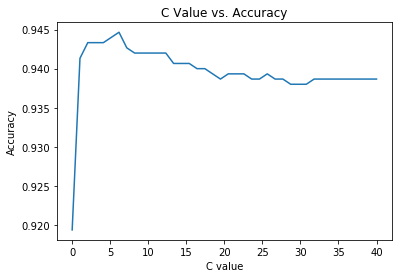

In [155]:
# Plots a graph that maps the values of C against the average cross validation accuracies. On the graph you can see what the best C is by looking at the maximum. 
log_plot = plt.plot(lambda_dict['C'], grid_search_lr.cv_results_['mean_test_score'])
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.title('C Value vs. Accuracy')

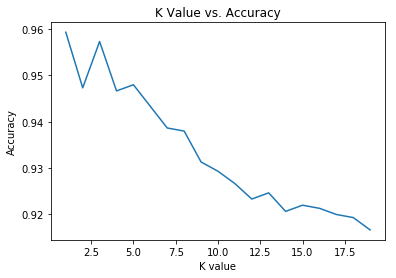

In [156]:
# Plots a graph that maps the values of the values of K against the average cross validation accuracies. On the graph you can see what the best K is, by looking at the maximum. 
knn_plot = plt.plot(k_dict['n_neighbors'], grid_search_knn.cv_results_['mean_test_score'])
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title('K Value vs. Accuracy')

In [86]:
# Function that makes a classifcation report for a classifier 
def make_report(clf_name, clf, x_test, y_test):
    predictions = clf.predict(x_test)
    print("Classification report for " + clf_name + ":\n", classification_report(y_test, predictions))

In [87]:
#Makes the classification reports for Logistic Regression and the KNN Classifier
lr_predictions = make_report("Logistic Regression", log_optimized, X_test_mnist_scaled, y_test_mnist)
knn_predictions = make_report("KNN Classifier", knn_optimized, X_test_mnist_scaled, y_test_mnist)

Classification report for Logistic Regression:
              precision    recall  f1-score   support

          0       0.96      0.93      0.94        27
          1       0.76      0.84      0.80        31
          2       1.00      1.00      1.00        27
          3       0.86      0.63      0.73        30
          4       0.91      0.91      0.91        33
          5       0.91      0.97      0.94        30
          6       0.97      0.97      0.97        30
          7       0.90      0.87      0.88        30
          8       0.69      0.89      0.78        28
          9       0.89      0.81      0.85        31

avg / total       0.88      0.88      0.88       297

Classification report for KNN Classifier:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.89      1.00      0.94        31
          2       1.00      0.89      0.94        27
          3       0.93      0.90      0.92        30
    

### Explanation and analysis of classification report 


The classification report calculates the precision, recall and F1-score for all the classes. The precision is the the ability of the classifier to not give any false postives, so the higher the precision score, the less false postitives there are. 

The recall is the ability of the classifier to find all the the positive samples. The F1-score is the weighted average of the precision and recall, where the best value a F1-score can have is 1. 

Precision = $tp/(tp + fp)$

Recall = $tp/(tp + fn)$

F1-score = $2 * (precision*recall)/(precision+recall)$

From the two classification reports, you can derive that the K-nearest-neighbor classifier performs better than the Logistic regression classifier. The K-nearest-neighbor classifier has a higher average precison, recall and F1-score over all the 10 classes. Also, the accuracy calculated for both before and after optimization is higher for the KNN Classifier. 

However, I think that it is a bit odd that the KNN Classifier is performing so much better, since the optimal K-value was very low (k=1), which would imply that it might be less accurate and more affected by outliers. 

In [95]:
# makes the confusion matrices for Logistic Regression and the KNN Classifier. 
lr_preds = log_optimized.fit(X_train_mnist_scaled, y_train_mnist).predict(X_test_mnist_scaled)
knn_preds = knn_optimized.fit(X_train_mnist_scaled, y_train_mnist).predict(X_test_mnist_scaled)
lr_cm = confusion_matrix(y_test_mnist, lr_preds)
knn_cm = confusion_matrix(y_test_mnist, knn_preds)
print("Confusion matrix for Logistic Regression:\n", lr_cm, "\n")
print("Confusion matrix for KNN Classifier:\n", knn_cm)

Confusion matrix for Logistic Regression:
 [[25  0  0  0  1  0  1  0  0  0]
 [ 0 26  0  2  0  0  0  0  3  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  2  0 19  0  3  0  2  4  0]
 [ 0  0  0  0 30  0  0  0  0  3]
 [ 0  1  0  0  0 29  0  0  0  0]
 [ 0  1  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  1  0  0 26  3  0]
 [ 0  2  0  0  1  0  0  0 25  0]
 [ 1  2  0  1  0  0  0  1  1 25]] 

Confusion matrix for KNN Classifier:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  3  0  0  0]
 [ 0  0  0 27  0  1  1  1  0  0]
 [ 0  0  0  0 29  0  0  1  0  3]
 [ 0  1  0  0  1 28  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  3  0  1  0  0  0  0 23  1]
 [ 0  0  0  1  0  2  0  1  0 27]]


### Explanation and analysis of the confusion matrices

In a confusion matrix, all the values on the diagonal represent the number of digits for which the prediction was equal to the actual true value. The values that are not on the diagonal are the number of times a digit has been misclassfied by the classifier. So for a confusion matrix $C$, $C_{i,j}$ is equal to the number of instances  known to be in group $i$ but predicted to be in group $j$

Also from the confusion matrices you can derive that the KNN Classifier perfoms better, as its confusion matrix has less off-diagonal values than the logistic regession confusion matrix does. Logistic regression misclassified instances in 9 out of the 10 classes, while the KNN classifier misclassified instances in only 7 out of the 10 classes. 

Class 8 is a class where you can clearly see the difference between the two classifiers. In the classification reports, logistic regression had a 0.69 precision score for class 8, while the precision score for the KNN Classifier was 1.00. This is also visisble in the confusion matrix. In the matrix you can see that logistic regression misclassified 3 class 8 instances as class 1, 4 as class 3, 3 as class 7 and 1 as class 9. While the KNN Classifier had no misclassifications.



### Discussion of results

To come to a final conclusion, it is clear that the optimization of the parameters K and C (1/lambda) proved to be useful in improving the accuracy score of the classifiers, as both accuracy score were higher after optimization. 

# Bonus

In [112]:
from sklearn.naive_bayes import GaussianNB # naive bayes classifier
from sklearn.neural_network import MLPClassifier # nn-classifier
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn import datasets # necessary for loading the iris dataset

###### Tuning more parameters of logistic regression

In [108]:
# Tuning more parameters of logisitic regression
maxiter_dict = {'max_iter': np.linspace(100, 1000, 10)}
grid_search_iter = GridSearchCV(logistic_regress, param_grid=maxiter_dict, cv=10)
grid_search_iter.fit(X_train_mnist_scaled, y_train_mnist)
best_maxiter = grid_search_iter.best_params_['max_iter']
print("The optimal number of iterations is: ", best_maxiter)

The optimal number of iterations is:  100.0


##### Adding additional classifiers (NN, Naive Bayes, decision tree)

In [97]:
# Training the Naive Bayes Classifier and making the classification report
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_mnist_scaled, y_train_mnist)
make_report("Naive Bayes Classifier", naive_bayes, X_test_mnist_scaled, y_test_mnist)


Classification report for Naive Bayes Classifier:
              precision    recall  f1-score   support

          0       0.96      0.96      0.96        27
          1       0.68      0.87      0.76        31
          2       0.95      0.70      0.81        27
          3       1.00      0.47      0.64        30
          4       0.96      0.82      0.89        33
          5       0.78      0.97      0.87        30
          6       0.97      0.97      0.97        30
          7       0.60      0.87      0.71        30
          8       0.53      0.68      0.59        28
          9       0.91      0.65      0.75        31

avg / total       0.84      0.79      0.79       297



In [101]:
nn_classifier = MLPClassifier()
nn_classifier.fit(X_train_mnist_scaled, y_train_mnist)
make_report("NN Classifier", nn_classifier, X_test_mnist_scaled, y_test_mnist)

Classification report for NN Classifier:
              precision    recall  f1-score   support

          0       1.00      0.93      0.96        27
          1       0.94      1.00      0.97        31
          2       0.96      0.93      0.94        27
          3       0.91      0.67      0.77        30
          4       0.97      0.91      0.94        33
          5       0.88      1.00      0.94        30
          6       0.97      0.97      0.97        30
          7       0.90      0.93      0.92        30
          8       0.82      0.96      0.89        28
          9       0.88      0.90      0.89        31

avg / total       0.92      0.92      0.92       297



In [103]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_mnist_scaled, y_train_mnist)
make_report("Decision Tree Classifier", decision_tree, X_test_mnist_scaled, y_test_mnist)

Classification report for Decision Tree Classifier:
              precision    recall  f1-score   support

          0       0.93      0.96      0.95        27
          1       0.72      0.58      0.64        31
          2       0.79      0.70      0.75        27
          3       0.67      0.47      0.55        30
          4       0.78      0.88      0.83        33
          5       0.82      0.90      0.86        30
          6       0.89      0.83      0.86        30
          7       0.67      0.87      0.75        30
          8       0.51      0.64      0.57        28
          9       0.78      0.68      0.72        31

avg / total       0.76      0.75      0.75       297



##### Analysing an additional dataset

In [153]:
iris = datasets.load_iris() #loading the iris dataset 
X = iris.data #features
Y = iris.target #targets

# normalizing the data using the scaler
scaler.fit(X) 
X_scaled = scaler.transform(X)
X_train_iris_scaled, X_test_iris_scaled, Y_train_iris, Y_test_iris = train_test_split(X_scaled, Y, test_size=0.30)

In [138]:
#Training Logistic regression and the KNN Classifier using the default settings, on the iris dataset 
logistic_regress_iris = LogisticRegression()
knn_classifier_iris = KNeighborsClassifier()
logistic_regress_iris.fit(X_train_iris_scaled, Y_train_iris)
knn_classifier_iris.fit(X_train_iris_scaled, Y_train_iris)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [143]:
#Reports the accuracy score before optimization
print("the logistic regression accuracy score before optimization is: ", np.mean(cross_val_score(logistic_regress_iris, X_train_iris_scaled, Y_train_iris, cv=10)))
print("the KNN Classifier accuracy score before optimization is: ", np.mean(cross_val_score(knn_classifier_iris, X_train_iris_scaled, Y_train_iris, cv=10)))

the logistic regression accuracy score before optimization is:  0.917525252525
the KNN Classifier accuracy score before optimization is:  0.963484848485


In [144]:
# optimizing the C for the Logistic regression classifier using GridSearchCV. C is the inverse of the regularization parameter lambda. 
lambda_dict_iris = {'C': np.linspace(0.01, 40 , 40)}
grid_search_lr_iris = GridSearchCV(logistic_regress, param_grid=lambda_dict, cv=10)
grid_search_lr_iris.fit(X_train_iris_scaled, Y_train_iris)
best_C_iris = grid_search_lr_iris.best_params_['C']

In [145]:
# optimizing the number of neighbors, K, for the KNN classifier using GridSearchCV
k_dict_iris = {'n_neighbors': np.arange(1, 20)}
grid_search_knn_iris = GridSearchCV(knn_classifier, param_grid=k_dict, cv=10)
grid_search_knn_iris.fit(X_train_iris_scaled, Y_train_iris)
best_K_iris = grid_search_knn_iris.best_params_['n_neighbors']

In [146]:
# training the logistic regresion and KNN Classifier with the optimized values for C and K.
log_optimized_iris = LogisticRegression(C=best_C)
log_optimized_iris.fit(X_train_iris_scaled, Y_train_iris)
knn_optimized_iris = KNeighborsClassifier(n_neighbors=best_K)
knn_optimized_iris.fit(X_train_iris_scaled, Y_train_iris)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [149]:
#Reports the accuracy score and the standard deviation of the classifiers after training with the optimized parameters. Also shows what the best C and K are. 
log_cv_score_optimized_iris = cross_val_score(log_optimized_iris, X_train_iris_scaled, Y_train_iris, cv=10)
knn_cv_score_optimized_iris = cross_val_score(knn_optimized_iris, X_train_iris_scaled, Y_train_iris, cv=10)
print("After optimization, the average accuracy of Logisitc Regression is:", log_cv_score_optimized_iris.mean(), ", and the standard deviation is:", np.std(log_cv_score_optimized_iris), "and the optimal C value is: ", best_C_iris)
print("After optimization, the average accuracy of KNN Classifier is:", knn_cv_score_optimized_iris.mean(), ", and the standard deviation is:", np.std(knn_cv_score_optimized_iris), "and the optimal K value is: ", best_K_iris)

After optimization, the average accuracy of Logisitc Regression is: 0.945707070707 , and the standard deviation is: 0.0584119894733 and the optimal C value is:  12.3146153846
After optimization, the average accuracy of KNN Classifier is: 0.946818181818 , and the standard deviation is: 0.05741784565 and the optimal K value is:  5


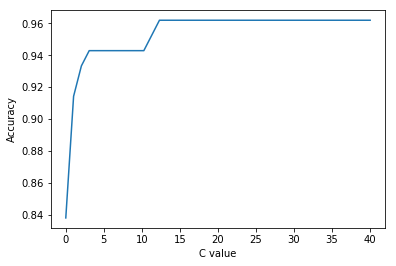

In [150]:
# Plots a graph that maps the values of C against the average cross validation accuracies. On the graph you can see what the best C is by looking at the maximum. 
log_plot_iris = plt.plot(lambda_dict_iris['C'], grid_search_lr_iris.cv_results_['mean_test_score'])
plt.xlabel("C value")
plt.ylabel("Accuracy")

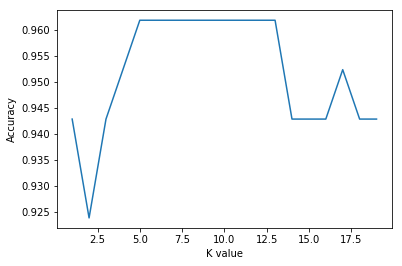

In [151]:
# Plots a graph that maps the values of the values of K against the average cross validation accuracies. On the graph you can see what the best K is, by looking at the maximum. 
knn_plot_iris = plt.plot(k_dict_iris['n_neighbors'], grid_search_knn_iris.cv_results_['mean_test_score'])
plt.xlabel("K value")
plt.ylabel("Accuracy")

In [154]:
# makes the confusion matrices for Logistic Regression and the KNN Classifier. 
lr_preds_iris = log_optimized_iris.fit(X_train_iris_scaled, Y_train_iris).predict(X_test_iris_scaled)
knn_preds_iris = knn_optimized_iris.fit(X_train_iris_scaled, Y_train_iris).predict(X_test_iris_scaled)
lr_cm_iris = confusion_matrix(Y_test_iris, lr_preds_iris)
knn_cm_iris = confusion_matrix(Y_test_iris, knn_preds_iris)
print("Confusion matrix for Logistic Regression:\n", lr_cm_iris, "\n")
print("Confusion matrix for KNN Classifier:\n", knn_cm_iris)

Confusion matrix for Logistic Regression:
 [[16  0  0]
 [ 0 12  0]
 [ 0  1 16]] 

Confusion matrix for KNN Classifier:
 [[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


### Analysis 

For the iris dataset, the difference in the accuracies of the classifiers after optimization is not as big as for the MNIST dataset. Before optimization, the KNN Classifier performed better than logistic regression, but after optimization both classifiers had similar results. 

This is also visible in the confusion matrix, where the Logistic Regression and the KNN Classifier had the same (amount of) misclassifications. 